In [157]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import mstats

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [46]:
df = pd.read_csv(r"C:\Users\User\Documents\Cases\Case cadastra\case\dataset.csv", sep=";")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173923 entries, 0 to 173922
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COD_CICLO               173923 non-null  int64  
 1   FLG_DATA                173923 non-null  int64  
 2   COD_MATERIAL            173923 non-null  int64  
 3   COD_CANAL               173923 non-null  object 
 4   DES_CATEGORIA_MATERIAL  173923 non-null  object 
 5   DES_MARCA_MATERIAL      173923 non-null  object 
 6   COD_REGIAO              173923 non-null  object 
 7   QT_VENDA_BRUTO          173923 non-null  object 
 8   QT_DEVOLUCAO            87164 non-null   float64
 9   VL_RECEITA_BRUTA        173923 non-null  object 
 10  VL_RECEITA_LIQUIDA      173923 non-null  object 
 11  FLG_CAMPANHA_MKT_A      173923 non-null  int64  
 12  FLG_CAMPANHA_MKT_B      173923 non-null  int64  
 13  FLG_CAMPANHA_MKT_C      173923 non-null  int64  
 14  FLG_CAMPANHA_MKT_D  

In [48]:
df.describe()

,COD_CICLO,FLG_DATA,COD_MATERIAL,QT_DEVOLUCAO,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E
count,173923.000000,173923.000000,173923.000000,87164.000000,173923.000000,173923.000000,173923.000000,173923.000000,173923.0
mean,201915.886553,0.289220,297755.596339,491.800720,0.016956,0.279388,0.045917,0.072981,0.0
std,85.864130,0.453402,150472.609616,722.866615,0.129106,0.448700,0.209305,0.260105,0.0
min,201801.000000,0.000000,6246.000000,234.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,201815.000000,0.000000,152658.000000,234.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,201911.000000,0.000000,420546.000000,270.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,202006.000000,1.000000,439656.000000,444.000000,0.000000,1.000000,0.000000,0.000000,0.0
max,202101.000000,1.000000,502386.000000,31662.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [49]:
# Verificar valores ausentes
print("\nValores ausentes por coluna:")
display(df.isnull().sum())


Valores ausentes por coluna:


COD_CICLO                      0
FLG_DATA                       0
COD_MATERIAL                   0
COD_CANAL                      0
DES_CATEGORIA_MATERIAL         0
DES_MARCA_MATERIAL             0
COD_REGIAO                     0
QT_VENDA_BRUTO                 0
QT_DEVOLUCAO               86759
VL_RECEITA_BRUTA               0
VL_RECEITA_LIQUIDA             0
FLG_CAMPANHA_MKT_A             0
FLG_CAMPANHA_MKT_B             0
FLG_CAMPANHA_MKT_C             0
FLG_CAMPANHA_MKT_D             0
FLG_CAMPANHA_MKT_E             0
PCT_DESCONTO              116972
VL_PRECO                       0
dtype: int64

In [50]:
# Converter variáveis contínuas para numéricas
colunas_continuas = ['QT_VENDA_BRUTO', 'QT_DEVOLUCAO', 'VL_RECEITA_BRUTA', 'VL_RECEITA_LIQUIDA', 'PCT_DESCONTO', 'VL_PRECO']

for coluna in colunas_continuas:
    if df[coluna].dtype == 'object':  # Verificar se a coluna é do tipo objeto
        df[coluna] = df[coluna].str.replace(',', '.').astype(float)
    else:
        df[coluna] = df[coluna].astype(float)

In [51]:
# Garantir que flags estão no formato binário
flags = ['FLG_DATA', 'FLG_CAMPANHA_MKT_A', 'FLG_CAMPANHA_MKT_B', 'FLG_CAMPANHA_MKT_C', 'FLG_CAMPANHA_MKT_D', 'FLG_CAMPANHA_MKT_E']
df[flags] = df[flags].astype(int)

In [52]:
# Verificar os tipos de dados novamente
df.dtypes

COD_CICLO                   int64
FLG_DATA                    int64
COD_MATERIAL                int64
COD_CANAL                  object
DES_CATEGORIA_MATERIAL     object
DES_MARCA_MATERIAL         object
COD_REGIAO                 object
QT_VENDA_BRUTO            float64
QT_DEVOLUCAO              float64
VL_RECEITA_BRUTA          float64
VL_RECEITA_LIQUIDA        float64
FLG_CAMPANHA_MKT_A          int64
FLG_CAMPANHA_MKT_B          int64
FLG_CAMPANHA_MKT_C          int64
FLG_CAMPANHA_MKT_D          int64
FLG_CAMPANHA_MKT_E          int64
PCT_DESCONTO              float64
VL_PRECO                  float64
dtype: object

Tipos de dados inconsistentes:

Colunas como QT_VENDA_BRUTO, VL_RECEITA_BRUTA, VL_RECEITA_LIQUIDA, PCT_DESCONTO e possivelmente VL_PRECO parecem ser armazenadas como strings (object), mas deveriam ser numéricas. Será necessário converter essas colunas.
Valores ausentes:

A coluna QT_DEVOLUCAO apresenta 86.759 valores ausentes (~50% dos dados).
A coluna PCT_DESCONTO apresenta 116.972 valores ausentes (~67% dos dados).
Flag de campanhas de marketing:

Colunas como FLG_CAMPANHA_MKT_A têm uma média baixa, sugerindo que poucas observações estão associadas a campanhas específicas.
Distribuição de COD_CICLO:

Parece indicar ciclos de marketing ou vendas, com valores de 201801 até 202101.

#### Análise de Valores Ausentes

In [53]:
# Verificar valores ausentes
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / df.isnull().count()) * 100

# Exibir a quantidade de valores ausentes e a porcentagem
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Percentage', ascending=False)

missing_data

,Missing Values,Percentage
PCT_DESCONTO,116972,67.255050
QT_DEVOLUCAO,86759,49.883569
FLG_DATA,0,0.000000
COD_CICLO,0,0.000000
DES_CATEGORIA_MATERIAL,0,0.000000
COD_MATERIAL,0,0.000000
DES_MARCA_MATERIAL,0,0.000000
COD_REGIAO,0,0.000000
QT_VENDA_BRUTO,0,0.000000
COD_CANAL,0,0.000000


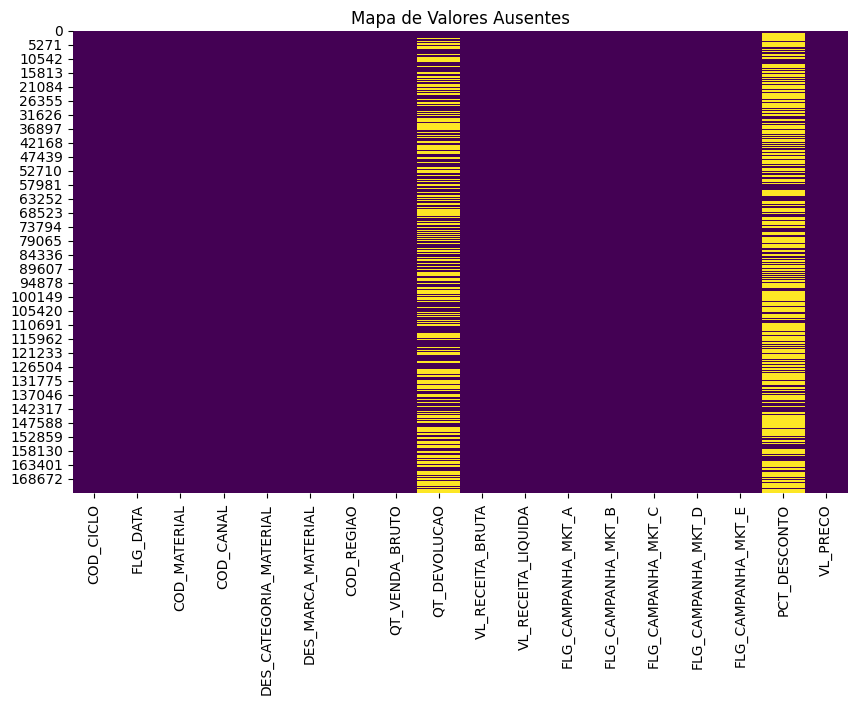

In [54]:
# Visualizar a distribuição de valores ausentes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Ausentes')
plt.show()

#### Distribuição das Variáveis Numéricas

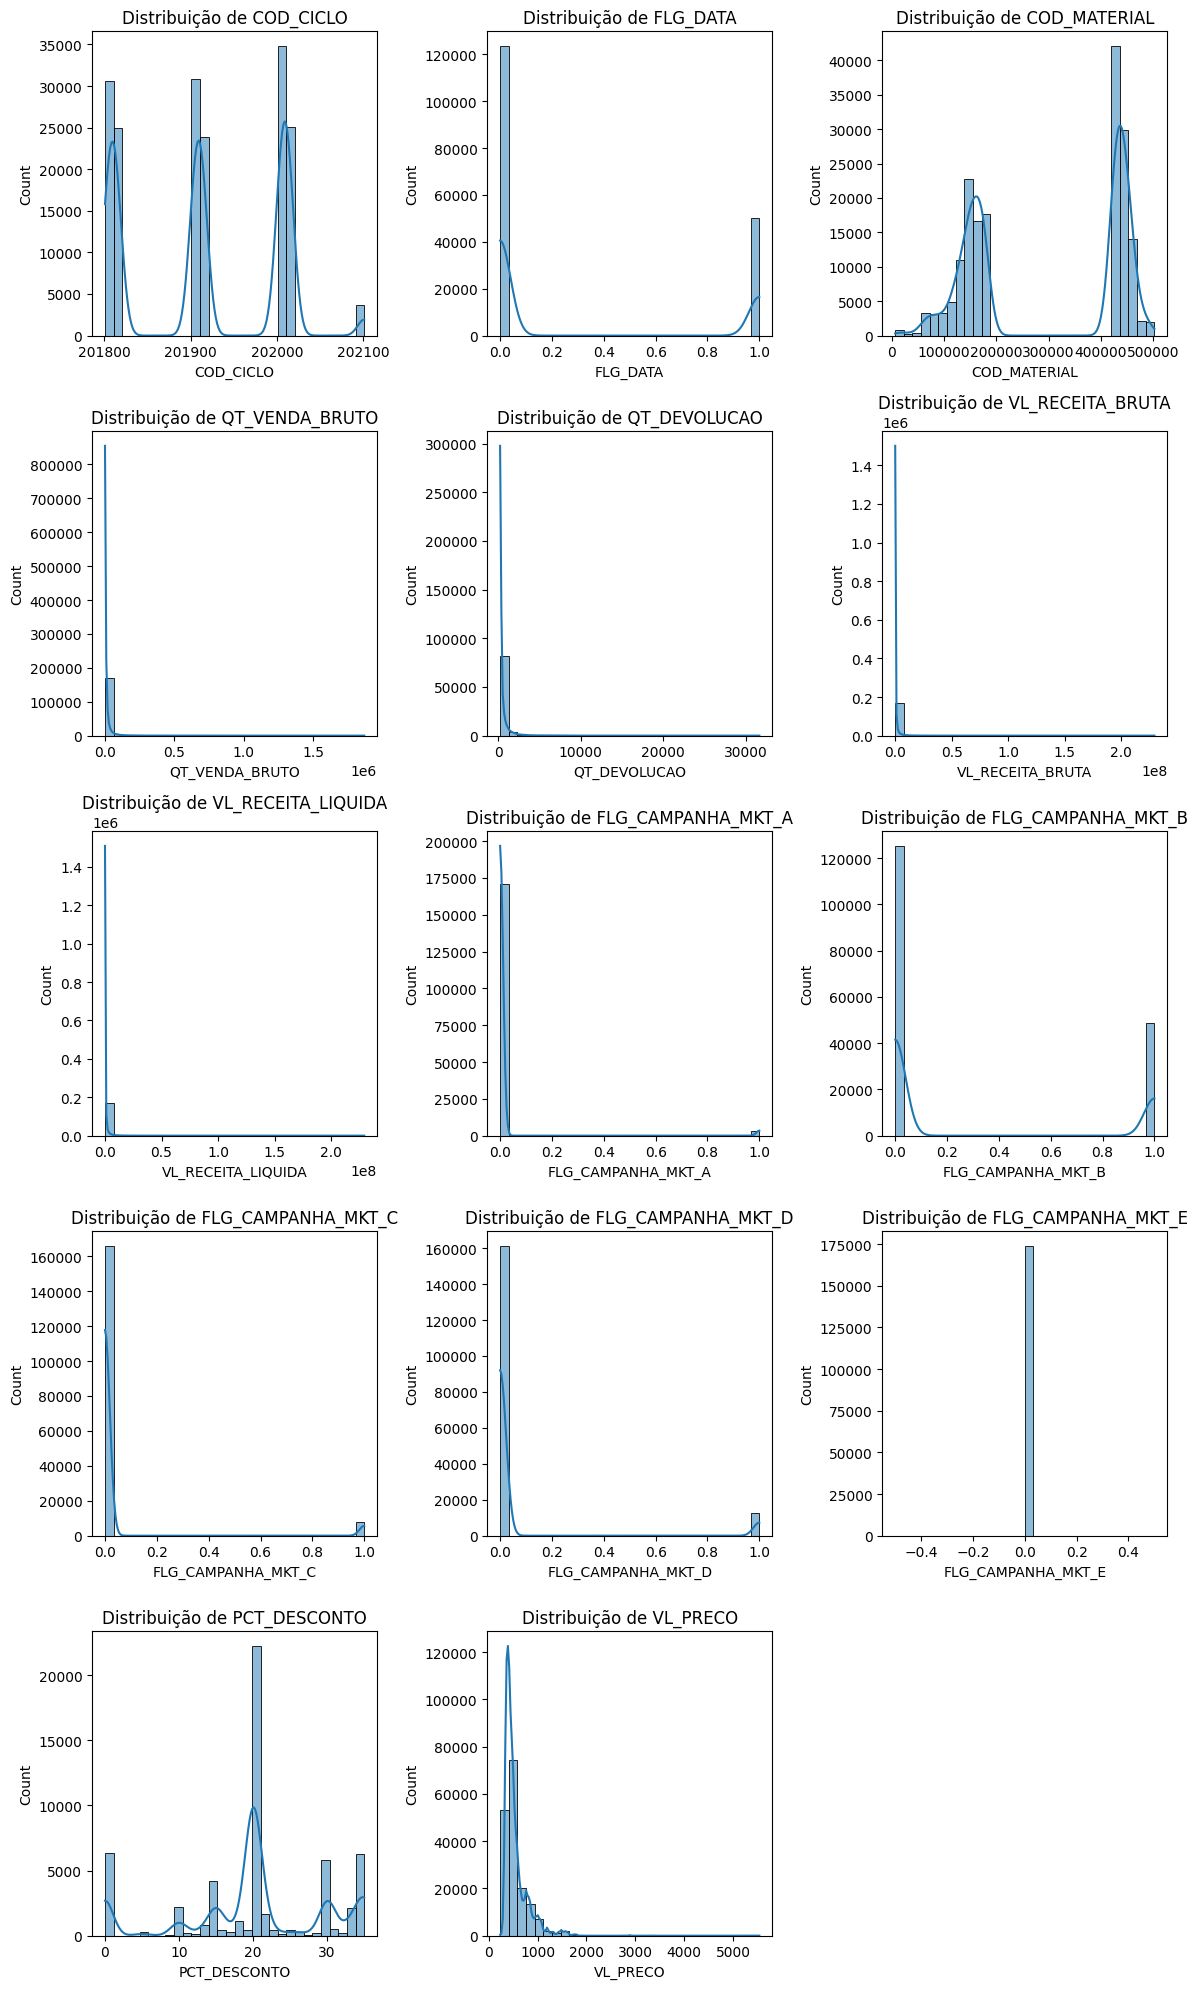

In [55]:
# Selecionar apenas as variáveis numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Número de variáveis numéricas
num_vars = len(numerical_cols)

# Definir o número de linhas e colunas para o grid, baseado no número de variáveis numéricas
ncols = 3  
nrows = np.ceil(num_vars / ncols).astype(int)  # número de linhas baseado no número de variáveis

# Visualizar histograma das variáveis numéricas
plt.figure(figsize=(12, 4 * nrows))  # Ajusta o tamanho da figura conforme o número de linhas
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(nrows, ncols, i)  # Ajuste o grid para o número de variáveis
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

#### Análise de Correlação entre Variáveis Numéricas

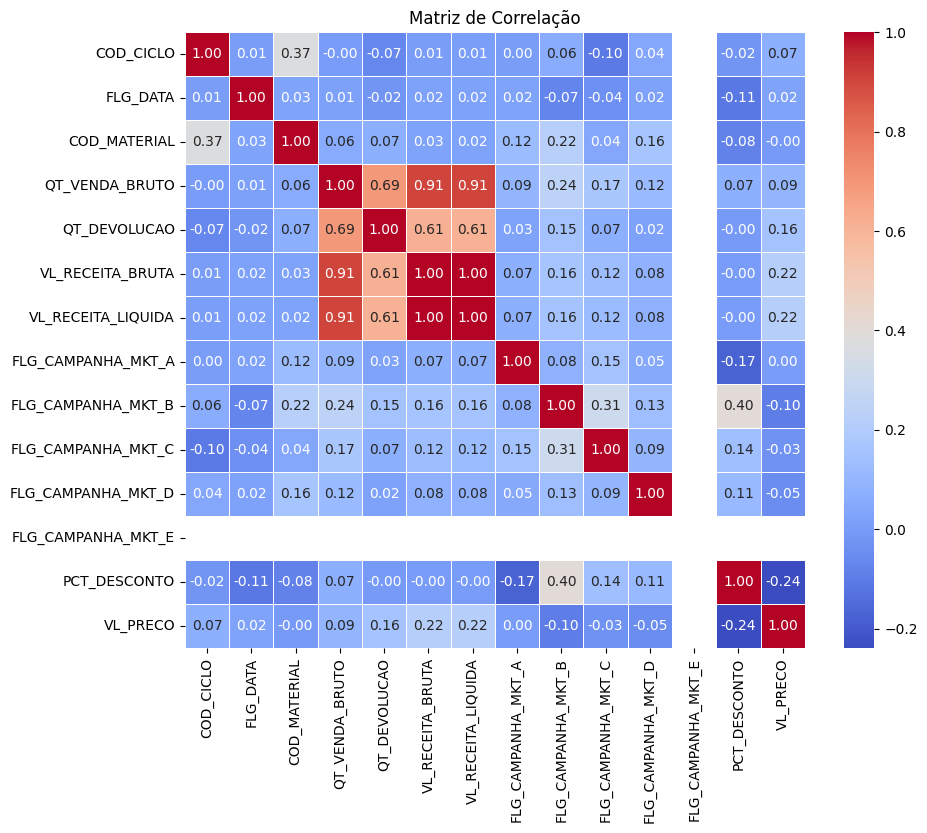

In [56]:
# Calcular a correlação entre variáveis numéricas
correlation_matrix = df[numerical_cols].corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

#### Identificação de Outliers

In [57]:
df.dtypes


COD_CICLO                   int64
FLG_DATA                    int64
COD_MATERIAL                int64
COD_CANAL                  object
DES_CATEGORIA_MATERIAL     object
DES_MARCA_MATERIAL         object
COD_REGIAO                 object
QT_VENDA_BRUTO            float64
QT_DEVOLUCAO              float64
VL_RECEITA_BRUTA          float64
VL_RECEITA_LIQUIDA        float64
FLG_CAMPANHA_MKT_A          int64
FLG_CAMPANHA_MKT_B          int64
FLG_CAMPANHA_MKT_C          int64
FLG_CAMPANHA_MKT_D          int64
FLG_CAMPANHA_MKT_E          int64
PCT_DESCONTO              float64
VL_PRECO                  float64
dtype: object

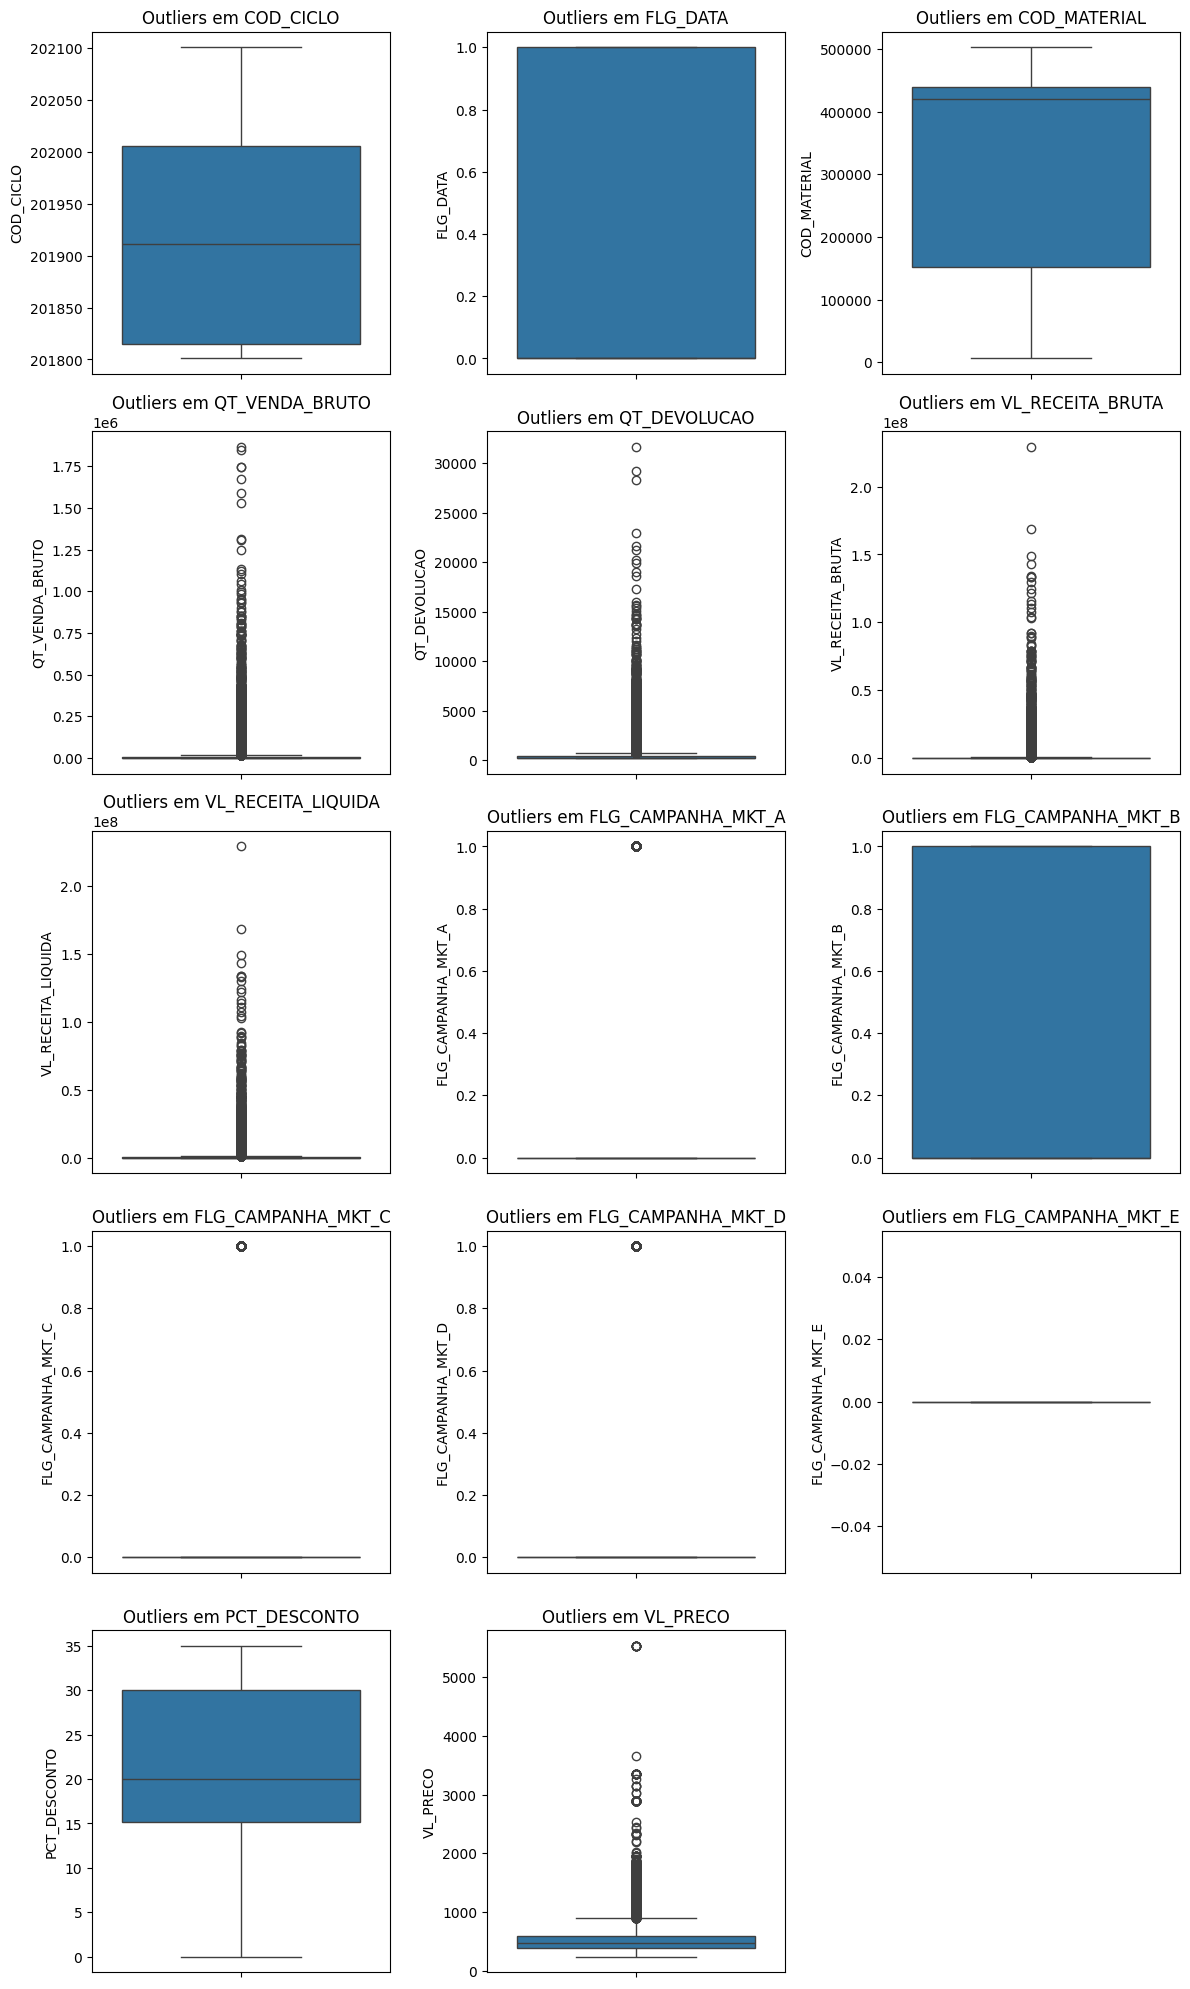

In [58]:
# Número de variáveis numéricas
num_vars = len(numerical_cols)

# Número de variáveis numéricas
num_vars = len(numerical_cols)

# Definir o número de linhas e colunas para o grid, baseado no número de variáveis numéricas
ncols = 3  
nrows = np.ceil(num_vars / ncols).astype(int)  # número de linhas baseado no número de variáveis

# Visualizar boxplot para identificar outliers com hue
plt.figure(figsize=(12, 4 * nrows)) 
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(nrows, ncols, i)  
    sns.boxplot(data=df, y=col)  
    plt.title(f'Outliers em {col}')
plt.tight_layout()
plt.show()

### Data cleaning 

#### Ajustando valores nulos

In [59]:
df.isnull().sum()

COD_CICLO                      0
FLG_DATA                       0
COD_MATERIAL                   0
COD_CANAL                      0
DES_CATEGORIA_MATERIAL         0
DES_MARCA_MATERIAL             0
COD_REGIAO                     0
QT_VENDA_BRUTO                 0
QT_DEVOLUCAO               86759
VL_RECEITA_BRUTA               0
VL_RECEITA_LIQUIDA             0
FLG_CAMPANHA_MKT_A             0
FLG_CAMPANHA_MKT_B             0
FLG_CAMPANHA_MKT_C             0
FLG_CAMPANHA_MKT_D             0
FLG_CAMPANHA_MKT_E             0
PCT_DESCONTO              116972
VL_PRECO                       0
dtype: int64

In [60]:
# Imputar QT_DEVOLUCAO com a mediana
df['QT_DEVOLUCAO'] = df['QT_DEVOLUCAO'].fillna(df['QT_DEVOLUCAO'].median())

# Imputar PCT_DESCONTO com a mediana
df['PCT_DESCONTO'] = df['PCT_DESCONTO'].fillna(df['PCT_DESCONTO'].median())

#### Distribuição de Variáveis Numéricas (Detalhada)

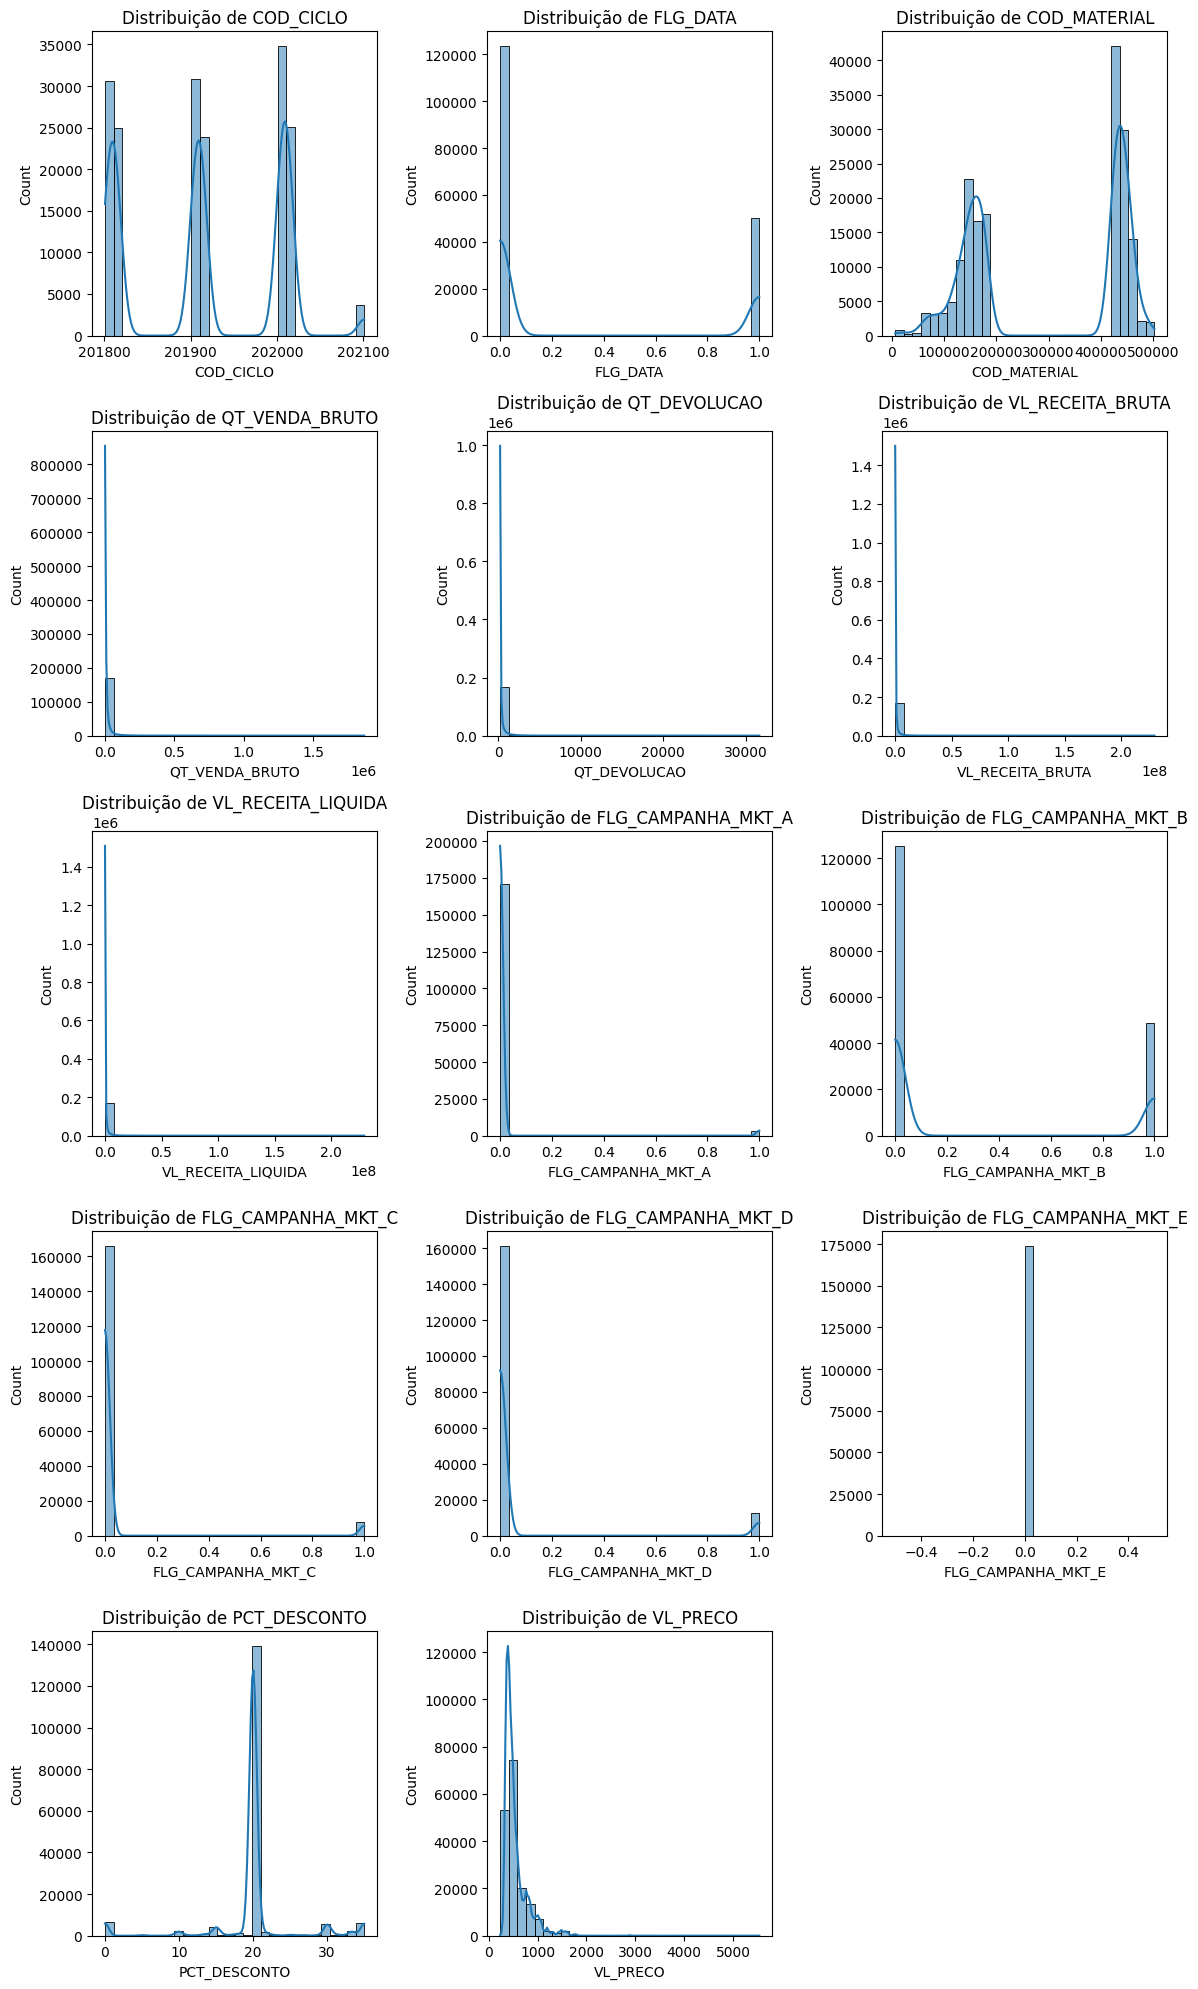

In [61]:
# Selecionar apenas as variáveis numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Número de variáveis numéricas
num_vars = len(numerical_cols)

# Definir o número de linhas e colunas para o grid, baseado no número de variáveis numéricas
ncols = 3  
nrows = np.ceil(num_vars / ncols).astype(int)  # número de linhas baseado no número de variáveis

# Visualizar histograma das variáveis numéricas
plt.figure(figsize=(12, 4 * nrows))  # Ajusta o tamanho da figura conforme o número de linhas
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(nrows, ncols, i)  # Ajuste o grid para o número de variáveis
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

#### Análise de Outliers

In [62]:
# Aplicar Winsorization em variáveis numéricas
for col in numerical_cols:
    df[col] = mstats.winsorize(df[col], limits=[0.05, 0.05])  # Limitar 5% superior e inferior

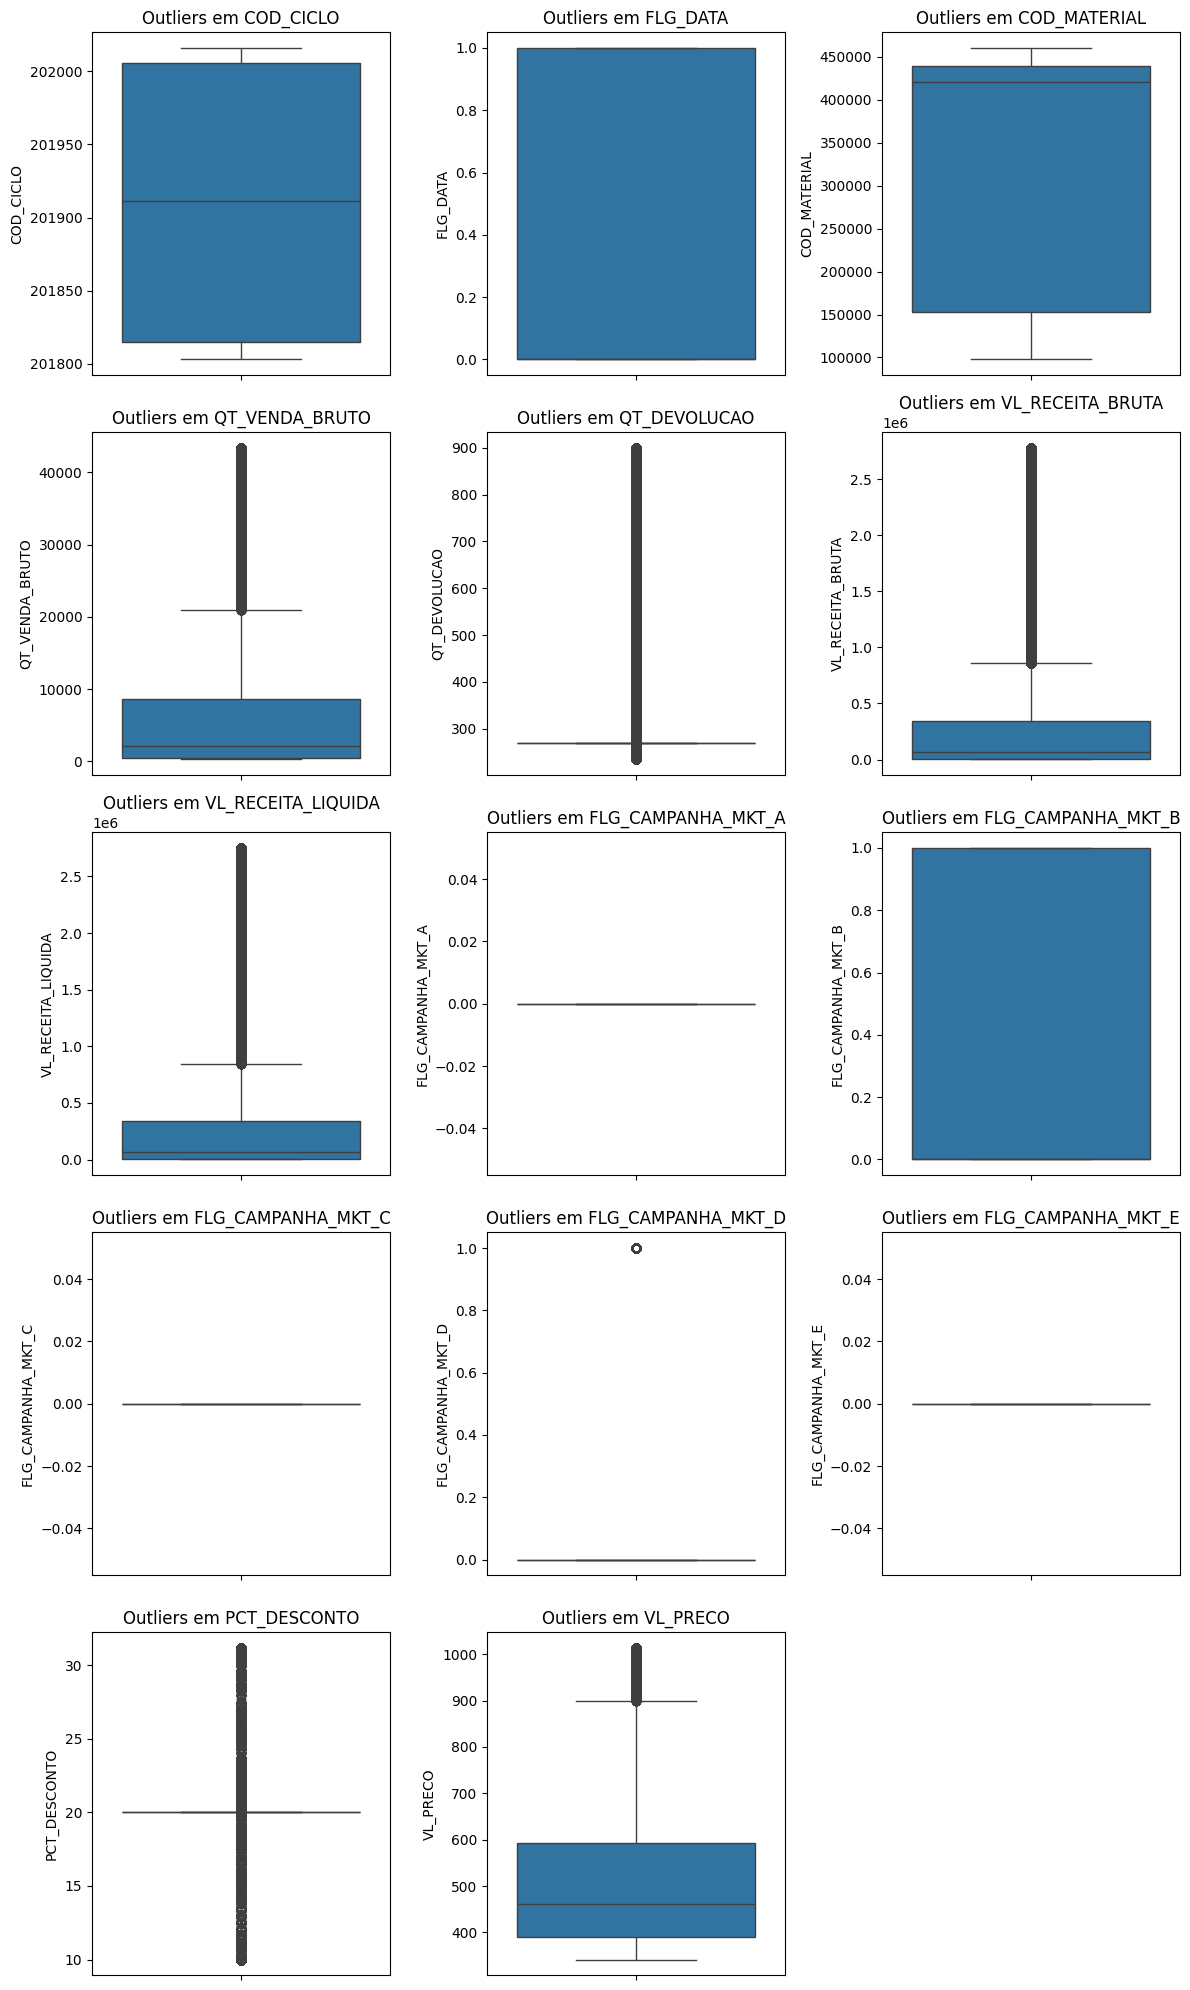

In [63]:
# Número de variáveis numéricas
num_vars = len(numerical_cols)

# Número de variáveis numéricas
num_vars = len(numerical_cols)

# Definir o número de linhas e colunas para o grid, baseado no número de variáveis numéricas
ncols = 3  
nrows = np.ceil(num_vars / ncols).astype(int)  # número de linhas baseado no número de variáveis

# Visualizar boxplot para identificar outliers com hue
plt.figure(figsize=(12, 4 * nrows)) 
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(nrows, ncols, i)  
    sns.boxplot(data=df, y=col)  
    plt.title(f'Outliers em {col}')
plt.tight_layout()
plt.show()

#### Verificação das Variáveis Categóricas

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173923 entries, 0 to 173922
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COD_CICLO               173923 non-null  int64  
 1   FLG_DATA                173923 non-null  int64  
 2   COD_MATERIAL            173923 non-null  int64  
 3   COD_CANAL               173923 non-null  object 
 4   DES_CATEGORIA_MATERIAL  173923 non-null  object 
 5   DES_MARCA_MATERIAL      173923 non-null  object 
 6   COD_REGIAO              173923 non-null  object 
 7   QT_VENDA_BRUTO          173923 non-null  float64
 8   QT_DEVOLUCAO            173923 non-null  float64
 9   VL_RECEITA_BRUTA        173923 non-null  float64
 10  VL_RECEITA_LIQUIDA      173923 non-null  float64
 11  FLG_CAMPANHA_MKT_A      173923 non-null  int64  
 12  FLG_CAMPANHA_MKT_B      173923 non-null  int64  
 13  FLG_CAMPANHA_MKT_C      173923 non-null  int64  
 14  FLG_CAMPANHA_MKT_D  

In [66]:
categorical_cols = ["COD_CANAL", "DES_CATEGORIA_MATERIAL", "DES_MARCA_MATERIAL", "COD_REGIAO"]

In [67]:
categorical_summary = df[categorical_cols].nunique()
print(categorical_summary)

COD_CANAL                  2
DES_CATEGORIA_MATERIAL     6
DES_MARCA_MATERIAL        85
COD_REGIAO                 2
dtype: int64


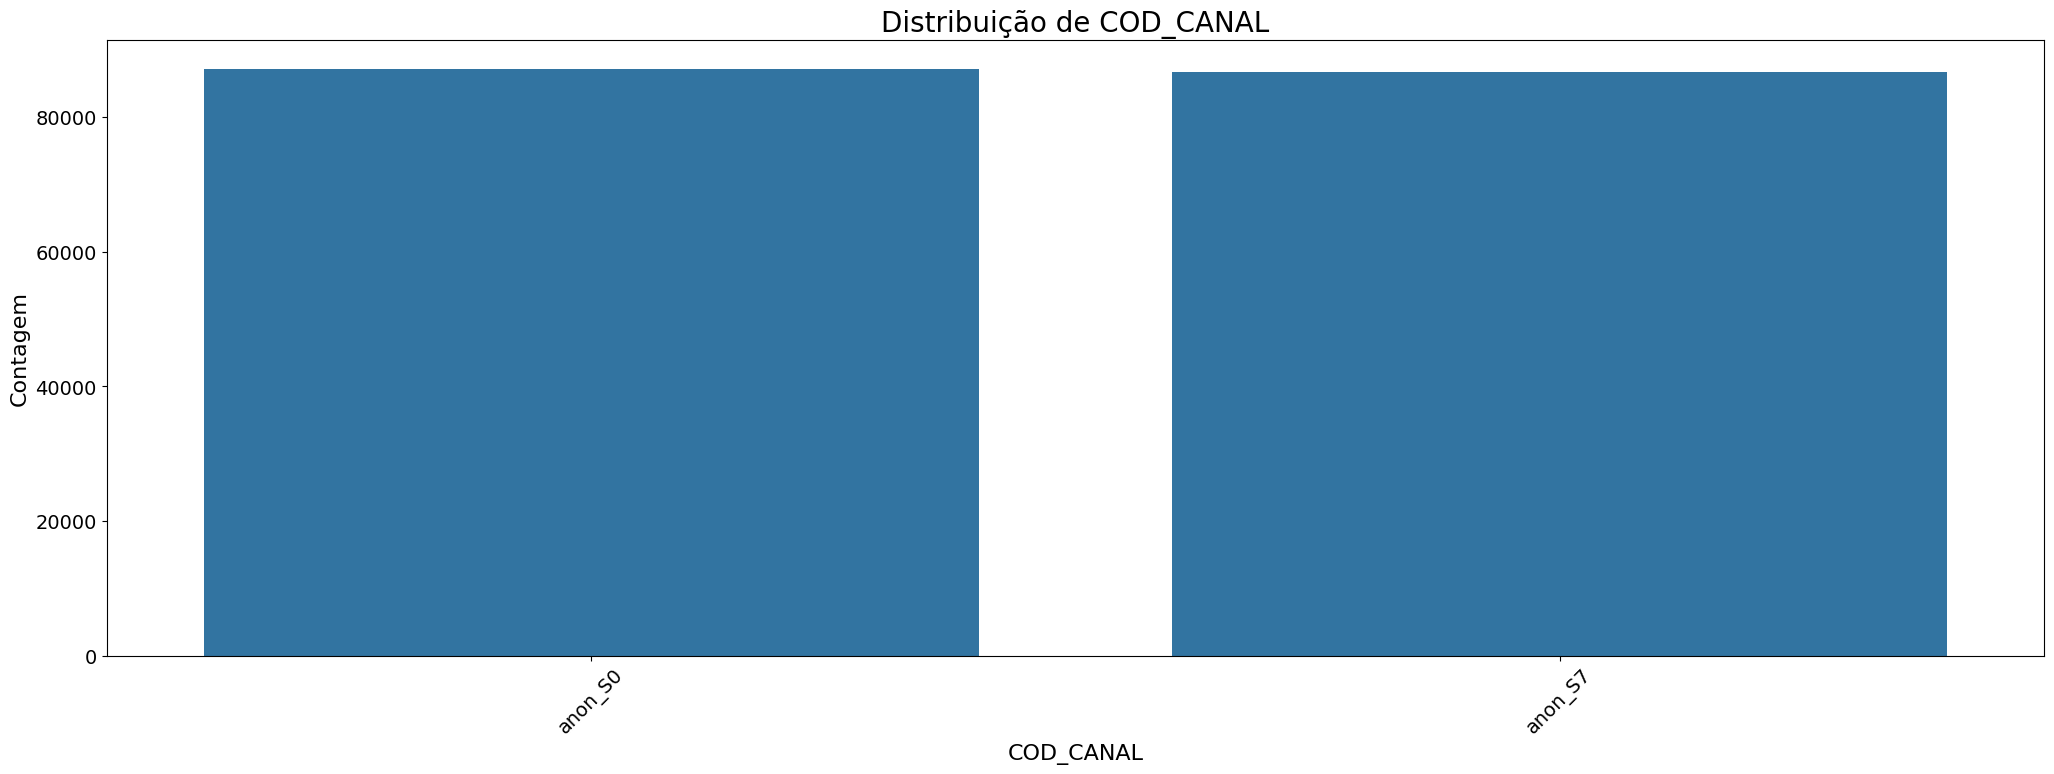

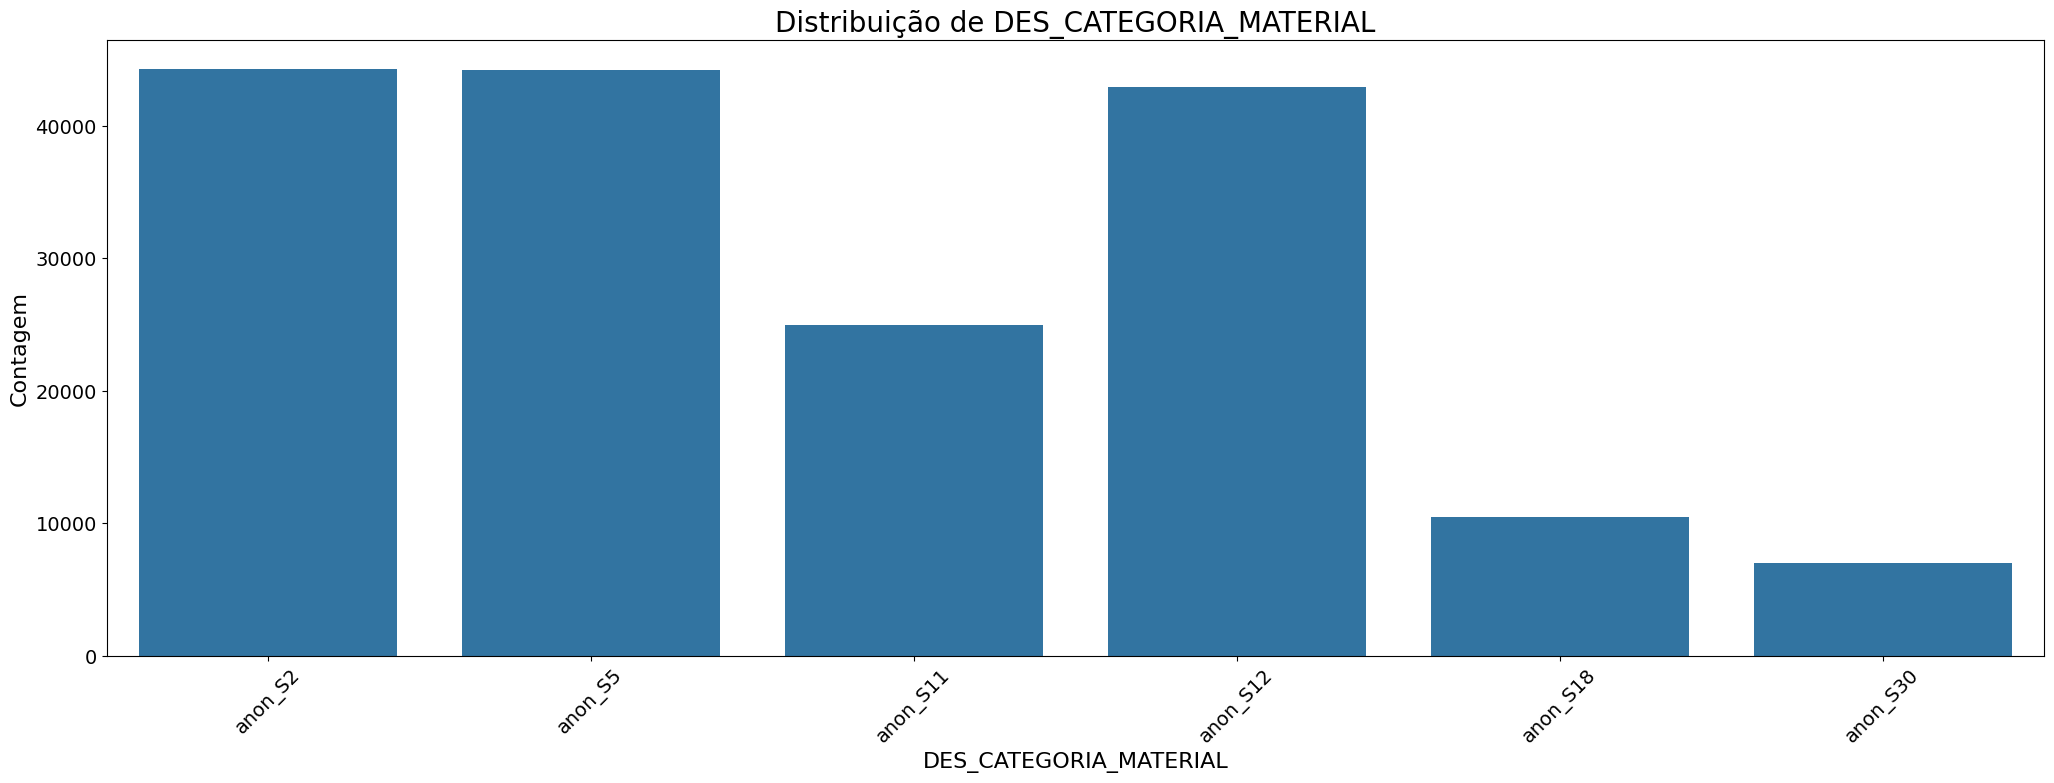

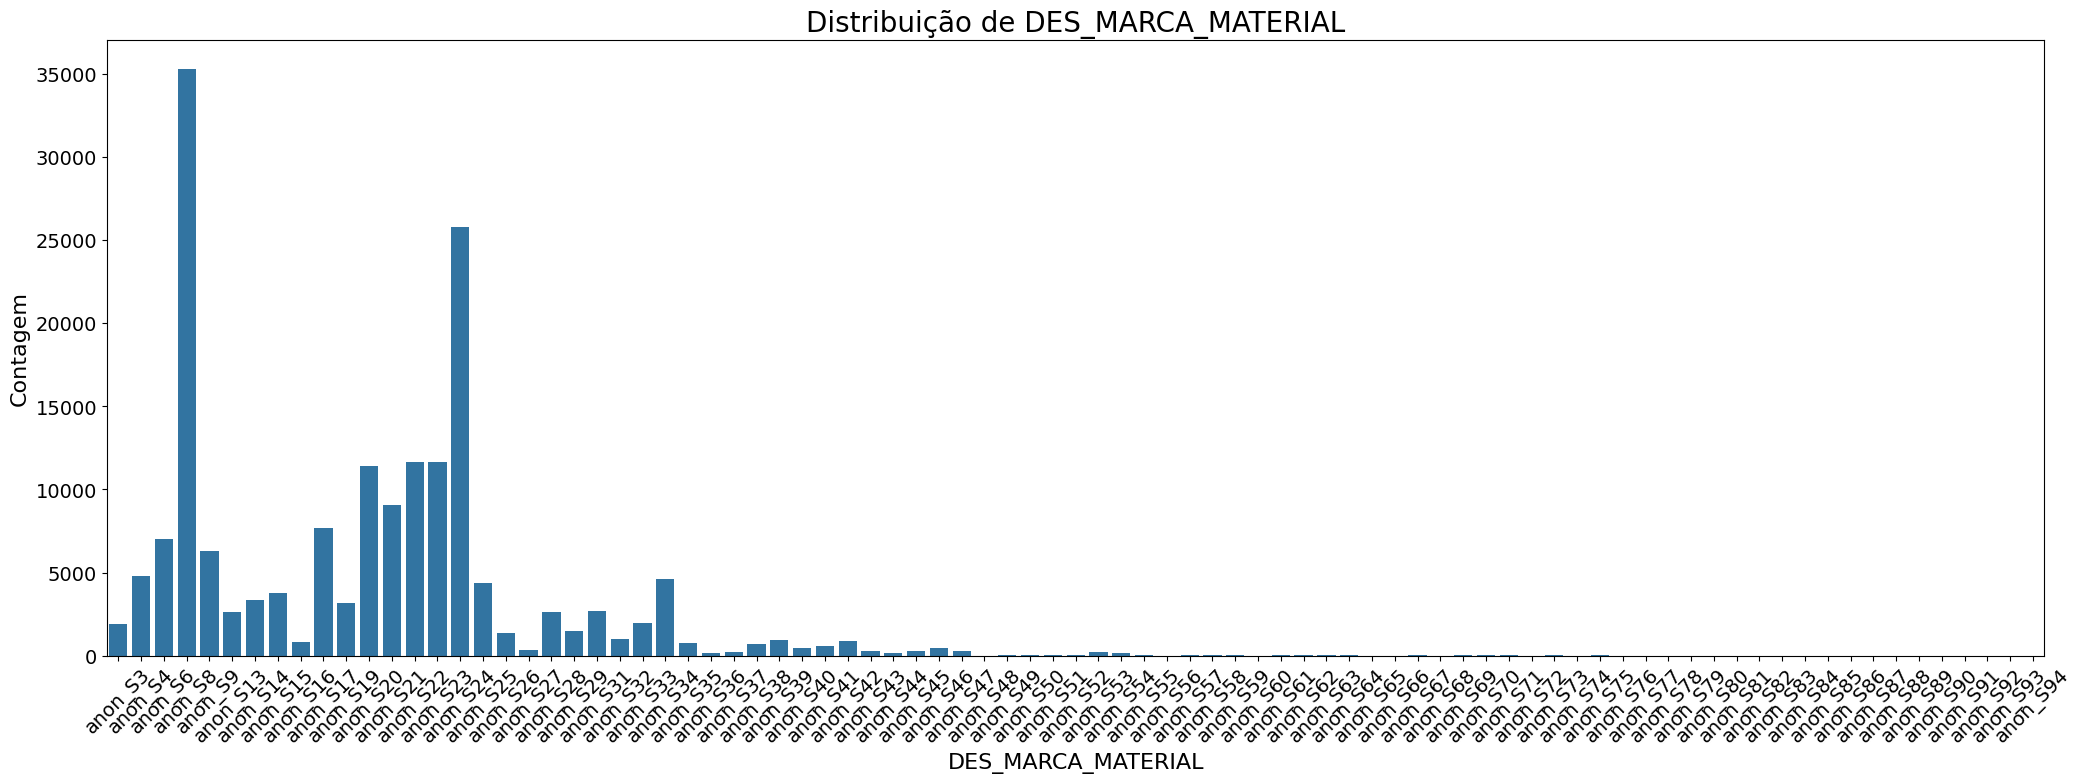

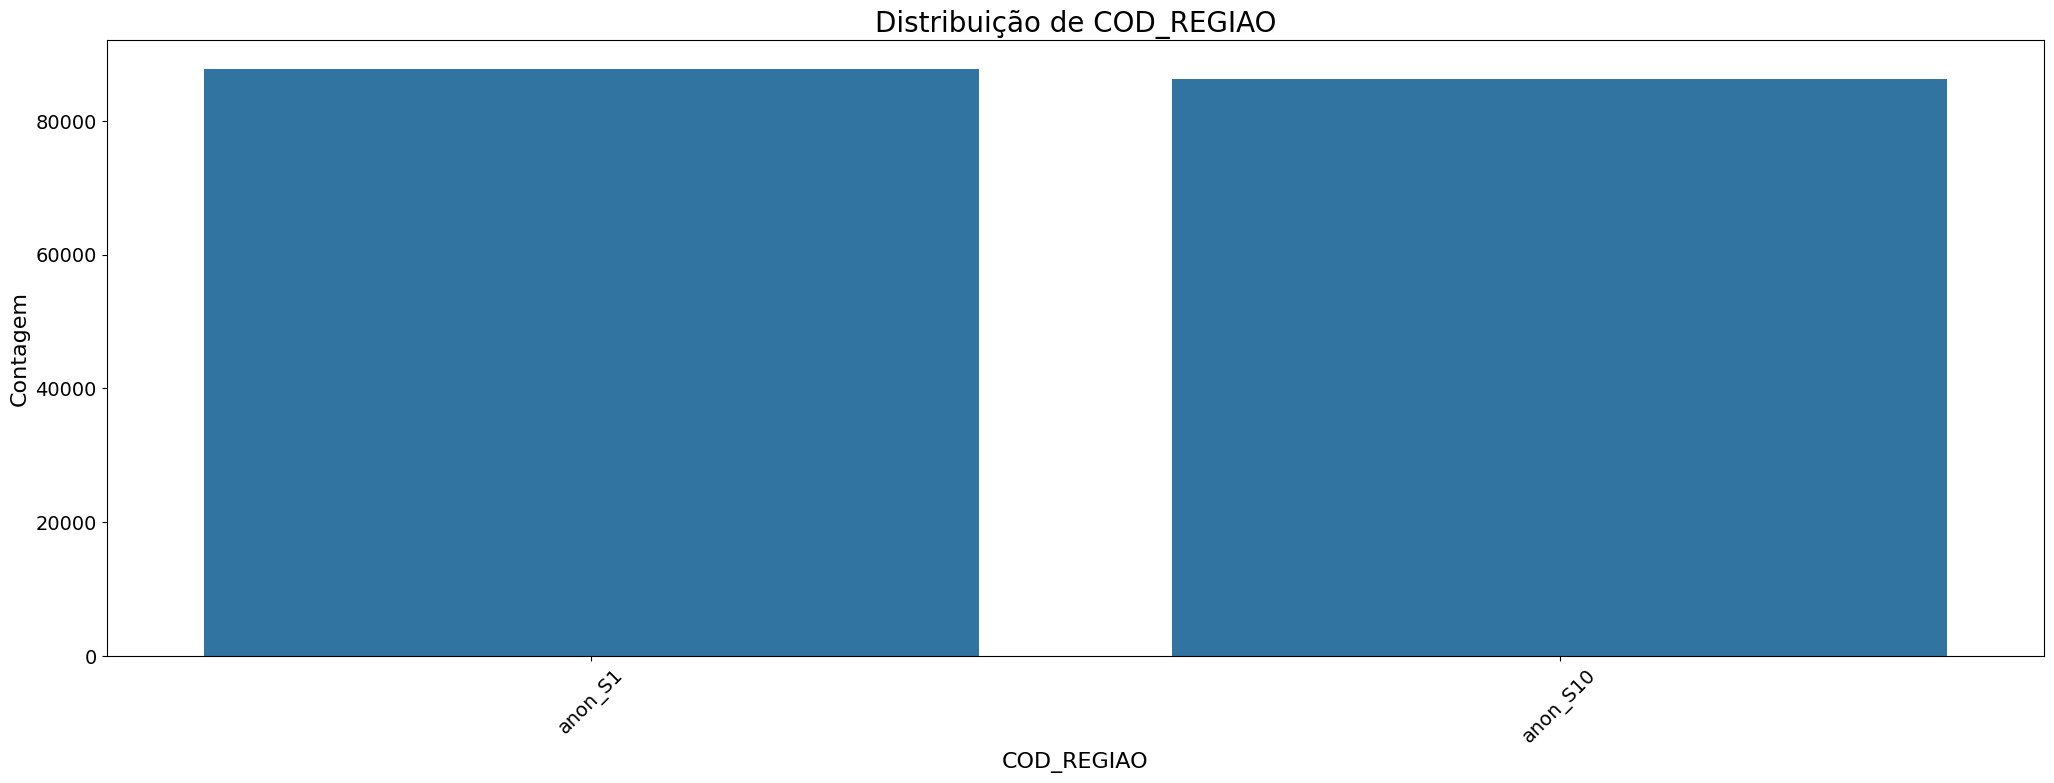

In [77]:
# Visualizar a distribuição de uma variável categórica (exemplo: COD_CANAL)

for col in categorical_cols:
    plt.figure(figsize=(25, 8))
    sns.countplot(x=col, data=df)
    
    plt.title(f'Distribuição de {col}', fontsize=20)
    

    plt.xlabel(col, fontsize=16)
    
    
    plt.ylabel('Contagem', fontsize=16)
    
    plt.xticks(rotation=45, fontsize=14)
    
    plt.tick_params(axis='both', labelsize=14)
    
    plt.show()

### Feature Engineering 

#### Criação de Variáveis Agregadas

In [81]:
df.columns

Index(['COD_CICLO', 'FLG_DATA', 'COD_MATERIAL', 'COD_CANAL',
       'DES_CATEGORIA_MATERIAL', 'DES_MARCA_MATERIAL', 'COD_REGIAO',
       'QT_VENDA_BRUTO', 'QT_DEVOLUCAO', 'VL_RECEITA_BRUTA',
       'VL_RECEITA_LIQUIDA', 'FLG_CAMPANHA_MKT_A', 'FLG_CAMPANHA_MKT_B',
       'FLG_CAMPANHA_MKT_C', 'FLG_CAMPANHA_MKT_D', 'FLG_CAMPANHA_MKT_E',
       'PCT_DESCONTO', 'VL_PRECO'],
      dtype='object')

In [145]:
# Agregações por COD_MATERIAL, COD_CANAL, COD_REGIAO
df_aggregated = df.groupby(['COD_MATERIAL', 'COD_CANAL', 'COD_REGIAO']).agg({
    'QT_VENDA_BRUTO': ['sum', 'mean', 'std'],
    'QT_DEVOLUCAO': ['sum', 'mean', 'std'],
    'VL_RECEITA_BRUTA': ['sum', 'mean', 'std'],
    'VL_RECEITA_LIQUIDA': ['sum', 'mean', 'std'],
    'PCT_DESCONTO': ['mean', 'std'],
    'VL_PRECO': ['mean', 'std']
}).reset_index()

In [146]:
df_aggregated.columns = ['_'.join(col).strip() for col in df_aggregated.columns.values]


In [147]:
df_aggregated = df_aggregated.rename(columns={
    "COD_MATERIAL_": "COD_MATERIAL",
    "COD_CANAL_": "COD_CANAL",
    "COD_REGIAO_": "COD_REGIAO"
})


In [148]:
df_aggregated.columns

Index(['COD_MATERIAL', 'COD_CANAL', 'COD_REGIAO', 'QT_VENDA_BRUTO_sum',
       'QT_VENDA_BRUTO_mean', 'QT_VENDA_BRUTO_std', 'QT_DEVOLUCAO_sum',
       'QT_DEVOLUCAO_mean', 'QT_DEVOLUCAO_std', 'VL_RECEITA_BRUTA_sum',
       'VL_RECEITA_BRUTA_mean', 'VL_RECEITA_BRUTA_std',
       'VL_RECEITA_LIQUIDA_sum', 'VL_RECEITA_LIQUIDA_mean',
       'VL_RECEITA_LIQUIDA_std', 'PCT_DESCONTO_mean', 'PCT_DESCONTO_std',
       'VL_PRECO_mean', 'VL_PRECO_std'],
      dtype='object')

In [149]:
# Mesclar as variáveis agregadas de volta ao dataframe original
df_final = df.merge(df_aggregated, on=['COD_MATERIAL', 'COD_CANAL', 'COD_REGIAO'], how='left')

In [150]:
df_final.isnull().sum()

COD_CICLO                    0
FLG_DATA                     0
COD_MATERIAL                 0
COD_CANAL                    0
DES_CATEGORIA_MATERIAL       0
DES_MARCA_MATERIAL           0
COD_REGIAO                   0
QT_VENDA_BRUTO               0
QT_DEVOLUCAO                 0
VL_RECEITA_BRUTA             0
VL_RECEITA_LIQUIDA           0
FLG_CAMPANHA_MKT_A           0
FLG_CAMPANHA_MKT_B           0
FLG_CAMPANHA_MKT_C           0
FLG_CAMPANHA_MKT_D           0
FLG_CAMPANHA_MKT_E           0
PCT_DESCONTO                 0
VL_PRECO                     0
COD_CICLO_4_primeiros        0
COD_CICLO_2_ultimos          0
year                         0
month                        0
quarter                      0
QT_VENDA_BRUTO_sum           0
QT_VENDA_BRUTO_mean          0
QT_VENDA_BRUTO_std         326
QT_DEVOLUCAO_sum             0
QT_DEVOLUCAO_mean            0
QT_DEVOLUCAO_std           326
VL_RECEITA_BRUTA_sum         0
VL_RECEITA_BRUTA_mean        0
VL_RECEITA_BRUTA_std       326
VL_RECEI

In [151]:
df_final = df_final.fillna(0)

#### Transformação de Variáveis Categóricas

In [152]:
categorical_cols = ['COD_MATERIAL', 'COD_CANAL', 'DES_CATEGORIA_MATERIAL', 'DES_MARCA_MATERIAL', 'COD_REGIAO']


In [153]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_final[col] = label_encoder.fit_transform(df[col])



#### Tratar Variáveis Temporais

In [154]:
# Adicionar características temporais com base no COD_CICLO
df_final['year'] = df_final['COD_CICLO'] // 100  # Os primeiros 4 dígitos indicam o ano
df_final['day'] = df_final['COD_CICLO'] % 100  # Os últimos 2 dígitos indicam o dia


#### Criar Features de Interações e Combinações

In [155]:
# Criar variáveis interativas
df_final['preco_medio'] = df_final['VL_RECEITA_LIQUIDA'] / df_final['QT_VENDA_BRUTO']
df_final['desconto_medio'] = df_final['PCT_DESCONTO'] * df_final['VL_PRECO']

#### Verificar as variáveis numéricas que precisam ser escalonadas 

In [156]:
# Identificar as variáveis numéricas
numerical_cols = df_final.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)

Index(['COD_CICLO', 'FLG_DATA', 'COD_MATERIAL', 'COD_CANAL',
       'DES_CATEGORIA_MATERIAL', 'DES_MARCA_MATERIAL', 'COD_REGIAO',
       'QT_VENDA_BRUTO', 'QT_DEVOLUCAO', 'VL_RECEITA_BRUTA',
       'VL_RECEITA_LIQUIDA', 'FLG_CAMPANHA_MKT_A', 'FLG_CAMPANHA_MKT_B',
       'FLG_CAMPANHA_MKT_C', 'FLG_CAMPANHA_MKT_D', 'FLG_CAMPANHA_MKT_E',
       'PCT_DESCONTO', 'VL_PRECO', 'year', 'month', 'quarter',
       'QT_VENDA_BRUTO_sum', 'QT_VENDA_BRUTO_mean', 'QT_VENDA_BRUTO_std',
       'QT_DEVOLUCAO_sum', 'QT_DEVOLUCAO_mean', 'QT_DEVOLUCAO_std',
       'VL_RECEITA_BRUTA_sum', 'VL_RECEITA_BRUTA_mean', 'VL_RECEITA_BRUTA_std',
       'VL_RECEITA_LIQUIDA_sum', 'VL_RECEITA_LIQUIDA_mean',
       'VL_RECEITA_LIQUIDA_std', 'PCT_DESCONTO_mean', 'PCT_DESCONTO_std',
       'VL_PRECO_mean', 'VL_PRECO_std', 'day', 'preco_medio',
       'desconto_medio'],
      dtype='object')


In [158]:
target = 'QT_VENDA_BRUTO'

# Variáveis numéricas a serem escalonadas
numerical_cols_to_scale = [
    'QT_DEVOLUCAO', 'VL_RECEITA_BRUTA', 'VL_RECEITA_LIQUIDA',
    'PCT_DESCONTO', 'VL_PRECO', 'QT_VENDA_BRUTO_sum', 'QT_VENDA_BRUTO_mean',
    'QT_VENDA_BRUTO_std', 'QT_DEVOLUCAO_sum', 'QT_DEVOLUCAO_mean', 'QT_DEVOLUCAO_std',
    'VL_RECEITA_BRUTA_sum', 'VL_RECEITA_BRUTA_mean', 'VL_RECEITA_BRUTA_std',
    'VL_RECEITA_LIQUIDA_sum', 'VL_RECEITA_LIQUIDA_mean', 'VL_RECEITA_LIQUIDA_std',
    'PCT_DESCONTO_mean', 'PCT_DESCONTO_std', 'VL_PRECO_mean', 'VL_PRECO_std',
    'preco_medio', 'desconto_medio'
]

# Inicializar o scaler
scaler = StandardScaler()

# Aplicar o escalonamento nas variáveis necessárias
df_final[numerical_cols_to_scale] = scaler.fit_transform(df_final[numerical_cols_to_scale])

# Verificar as primeiras linhas do dataframe após o escalonamento
df_final.head()

,COD_CICLO,FLG_DATA,COD_MATERIAL,COD_CANAL,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,COD_REGIAO,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,...,VL_RECEITA_LIQUIDA_sum,VL_RECEITA_LIQUIDA_mean,VL_RECEITA_LIQUIDA_std,PCT_DESCONTO_mean,PCT_DESCONTO_std,VL_PRECO_mean,VL_PRECO_std,day,preco_medio,desconto_medio
0,201917,1,1005,0,3,16,0,11934.0,0.513218,0.067134,...,-0.305620,-0.352606,-0.496836,-0.613150,0.076158,-0.482707,-0.527091,17,0.038345,-0.378266
1,202005,0,830,0,3,26,0,540.0,-0.460628,-0.499135,...,-0.096650,1.422342,1.517131,-0.256926,0.767882,1.206047,0.268876,5,0.491496,1.200626
2,201901,0,751,0,5,47,0,43398.0,3.434756,0.811169,...,-0.284664,-0.260589,-0.048999,0.377998,0.455290,-0.798283,-0.537615,1,-0.379387,0.001568
3,201813,0,827,1,3,68,0,438.0,-0.352423,-0.527348,...,-0.328763,-0.663998,-0.929228,-0.263781,-1.998635,0.064261,-0.148814,13,-0.523059,-0.400609
4,202006,1,1224,0,5,79,0,2760.0,-0.532765,-0.421233,...,-0.316629,-0.354782,-0.451598,1.493700,1.580087,-0.625727,-0.557635,6,-0.140448,-0.497428


In [159]:
df_final.to_csv('dataset_final.csv', index=False)

In [ ]:
# Extrair os primeiros 4 dígitos e os dois últimos
df_final['COD_CICLO_4_primeiros'] = a['COD_CICLO'].astype(str).str[:4]
df_final['COD_CICLO_2_ultimos'] = a['COD_CICLO'].astype(str).str[-2:]

In [118]:
a = df

In [120]:
# Extrair os primeiros 4 dígitos e os dois últimos
a['COD_CICLO_4_primeiros'] = a['COD_CICLO'].astype(str).str[:4]
a['COD_CICLO_2_ultimos'] = a['COD_CICLO'].astype(str).str[-2:]

In [124]:
a['COD_CICLO_4_primeiros'].value_counts()

COD_CICLO_4_primeiros
2020    63619
2018    55535
2019    54769
Name: count, dtype: int64

In [125]:
# Adicionar características temporais com base no COD_CICLO (supondo que seja um código que represente um mês/ano)
a['year'] = a['COD_CICLO'] // 100  # Assumindo que o primeiro 2 dígitos indicam o ano
a['month'] = a['COD_CICLO'] % 100  # Assumindo que os últimos 2 dígitos indicam o mês
a['quarter'] = a['month'] // 3 + 1  # Calculando o trimestre


In [126]:
a

,COD_CICLO,FLG_DATA,COD_MATERIAL,COD_CANAL,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,COD_REGIAO,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,...,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E,PCT_DESCONTO,VL_PRECO,COD_CICLO_4_primeiros,COD_CICLO_2_ultimos,year,month,quarter
0,201917,1,431148,anon_S0,anon_S2,anon_S3,anon_S1,11934.0,414.0,431869.08,...,0,0,0,20.00,455.40,2019,17,2019,17,6
1,202005,0,177816,anon_S0,anon_S2,anon_S4,anon_S1,540.0,252.0,27743.40,...,0,0,0,20.00,773.40,2020,05,2020,5,2
2,201901,0,171786,anon_S0,anon_S5,anon_S6,anon_S1,43398.0,900.0,962860.20,...,0,0,0,31.16,341.40,2019,01,2019,1,1
3,201813,0,177774,anon_S7,anon_S2,anon_S8,anon_S1,438.0,270.0,7608.60,...,0,0,0,20.00,450.90,2018,13,2018,13,5
4,202006,1,446592,anon_S0,anon_S5,anon_S9,anon_S1,2760.0,240.0,83339.40,...,0,0,0,20.00,431.40,2020,06,2020,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173918,202008,1,444558,anon_S7,anon_S5,anon_S14,anon_S10,4266.0,270.0,102125.58,...,0,0,0,20.00,389.40,2020,08,2020,8,3
173919,201812,1,178836,anon_S7,anon_S2,anon_S24,anon_S1,7224.0,270.0,295911.00,...,0,0,0,20.00,490.32,2018,12,2018,12,5
173920,202011,1,177594,anon_S7,anon_S12,anon_S23,anon_S1,360.0,270.0,10516.20,...,0,0,0,20.00,724.38,2020,11,2020,11,4
173921,201907,0,172902,anon_S7,anon_S2,anon_S23,anon_S10,384.0,270.0,5562.18,...,0,0,0,20.00,491.40,2019,07,2019,7,3


In [123]:
a.COD_CICLO_2_ultimos.value_counts()

COD_CICLO_2_ultimos
16    17724
03    15829
13    10108
11    10012
10     9955
14     9953
15     9944
12     9878
08     9719
09     9631
06     9546
07     9502
04     9420
05     9217
01     6906
17     6815
02     6519
18     3245
Name: count, dtype: int64

a